In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")


# import and concat the three files with added column to indicate the source
df1 = pd.read_csv('results/sage_mnist.csv')
df1['source'] = 'MNIST'
df1['Model'] = 'SAGE'
df2 = pd.read_csv('results/sage_ppi.csv')
df2['source'] = 'PPI'
df2['Model'] = 'SAGE'
df3 = pd.read_csv('results/sage_reddit.csv')
df3['source'] = 'REDDIT-BINARY'
df3['Model'] = 'SAGE'

df4 = pd.read_csv('results/results_GIN_PPI.csv')
df4['source'] = 'PPI'
df4['Model'] = 'GIN'

df5 = pd.read_csv('results/gin_reddit.csv')
df5['source'] = 'REDDIT-BINARY'
df5['Model'] = 'GIN'

df6 = pd.read_csv('results/gin_mnist.csv')
df6['source'] = 'MNIST'
df6['Model'] = 'GIN'


df = pd.concat([df1, df2, df3, df4, df5, df6])

df.head()

,K,valid_score,test_score,lr,num_layers,hidden_size,source,Model
0,0.0,0.727476,0.00000,0.01,4.0,8.0,MNIST,SAGE
1,0.0,0.795185,0.00000,0.01,4.0,16.0,MNIST,SAGE
2,0.0,0.752102,0.00000,0.01,4.0,32.0,MNIST,SAGE
3,0.0,0.795185,0.77201,0.01,4.0,16.0,MNIST,SAGE
4,1.0,0.476928,0.00000,0.01,4.0,8.0,MNIST,SAGE


In [2]:
# get the unique parameters including lr num_layers, hidden_size used for each model and each dataset
df.groupby(['source', 'Model']).agg({'lr': 'unique', 'num_layers': 'unique', 'hidden_size': 'unique'})

lr  num_layers             hidden_size
source        Model                                                   
MNIST         GIN           [0.01]  [3.0, 4.0]             [8.0, 32.0]
              SAGE          [0.01]       [4.0]       [8.0, 16.0, 32.0]
PPI           GIN           [0.01]  [3.0, 5.0]            [32.0, 64.0]
              SAGE     [0.1, 0.01]       [2.0]  [256.0, 512.0, 1024.0]
REDDIT-BINARY GIN    [0.01, 0.001]       [3.0]            [16.0, 32.0]
              SAGE   [0.01, 0.001]  [2.0, 3.0]            [16.0, 32.0]

In [3]:
# drop all rows where test_score is zero
df = df[df['test_score'] != 0]
df.head()

,K,valid_score,test_score,lr,num_layers,hidden_size,source,Model
3,0.0,0.795185,0.772010,0.01,4.0,16.0,MNIST,SAGE
7,1.0,0.809393,0.756611,0.01,4.0,16.0,MNIST,SAGE
11,2.0,0.783854,0.804087,0.01,4.0,32.0,MNIST,SAGE
15,3.0,0.774625,0.818885,0.01,4.0,32.0,MNIST,SAGE
19,4.0,0.827668,0.794020,0.01,4.0,32.0,MNIST,SAGE


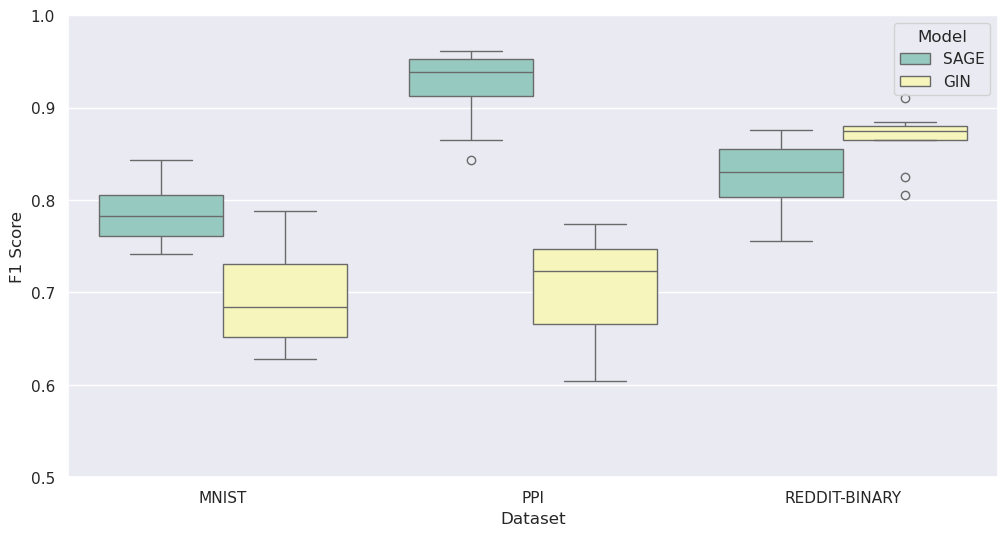

In [4]:
# make a box plot comparison between the three datasets and the two models based on the test_score
plt.figure(figsize=(12, 6))
sns.boxplot(x='source', y='test_score', hue='Model', data=df, palette='Set3')
# plt.title('Comparison of the two models performance on the three datasets')
# set y_axis between 0 and 1
plt.ylim(0.5, 1)
# set y_axis label
plt.ylabel('F1 Score')
# set x_axis label
plt.xlabel('Dataset')
plt.show()

In [5]:
# get mean and std for each model and dataset with 3 precision
df.groupby(['source', 'Model']).agg({'test_score': ['mean', 'std']}).round(3)

test_score       
                          mean    std
source        Model                  
MNIST         GIN        0.695  0.053
              SAGE       0.785  0.031
PPI           GIN        0.705  0.060
              SAGE       0.926  0.038
REDDIT-BINARY GIN        0.866  0.030
              SAGE       0.827  0.036